![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Working with APIs

#### Instructions 

Following the class example, create a function that returns the price, names of origin and arrival airports and the name of the company. Do it for all the flights between two dates that cost the same.

**Update:** For this lab, we were told to use an API of our own liking. 

<h1 style="color: #00BFFF;">00 |</h1>

In [1]:
# 📚 Basic libraries
import pandas as pd
import requests # to kindly request to scrape the web

In [2]:
# 🎯 Specific functions
def check_status(link):
    try:
        request = requests.get(link)
        request.raise_for_status()  # returns an HTTPError if the response is not OK
        print("All good! Response code is", request.status_code)
    except requests.exceptions.HTTPError as err:
        if request.status_code == 404:
            print("404: Oops, sorry we can't find that page!")
        else:
            print("The error code is", err.args[0]) # look up the 1st argument from HTTPError
        return None

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

<h3 style="color: #008080;">Connecting to the API</h3>

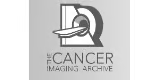
- We will use The Cancer Imaging Archive API
- The Cancer Imaging Archive (TCIA) is a public repository of cancer images and related clinical data for the express purpose of enabling open science research. Currently over 26 million radiologic images of cancer are contained in this repository. The API allows you to query metadata and download images from the various public collections available on TCIA

In [3]:
# We chose this API because it contains histopathology images, that we can later use for other projects
# Even though it's a public databased, we encountered the following issue:


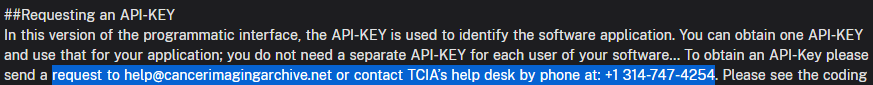

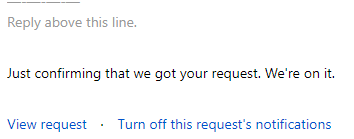

Email sent to request access

In [4]:
# Basically, we have to email them first to have access to it
# We encountered though a REST API we can use, with some collections
# Link can be found here > https://wiki.cancerimagingarchive.net/display/Public/TCIA+REST+API+Guide
# Since this is just a lab to test our skills connecting to API and retriving information, we will do the following:

In [5]:
url = # we erase it to avoid GitGuardian mail...

headers = {
	"api_key": # we erase it to avoid the GitGuardian mail...
	"X-RapidAPI-Key": "f2fdabd2a1mshf610b06c1fcc28dp1895cajsn9ac3276bc6eb",
	"X-RapidAPI-Host": "tcia.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

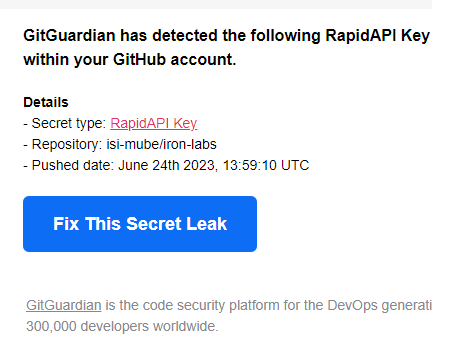

In [6]:
# just checking the len of the different collection of images
print(len(response.json()))

134


In [7]:
check_status(url)

All good! Response code is 200


In [8]:
api_df = response.json()

<h1 style="color: #00BFFF;">02 | Data Wrangling</h1>

<h3 style="color: #008080;">Retrieving all collections that are related to pathology</h3>

In [9]:
pathology = "pathology"

pathology_value= [value for value in api_df if pathology.lower() in value['Collection'].lower()]

In [10]:
# Making it a dataframe
df = pd.DataFrame(pathology_value)
df

,Collection
0,Lung-Fused-CT-Pathology
1,Prostate Fused-MRI-Pathology
